# Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning:** 
 - Deleting redundant columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations
4. **Data Visualization:** Using plots to find relations between the features.
    - Get Correlation between different variables
    - Plot all Neighbourhood Group
    - Neighbourhood
    - Room Type
    - Relation between neighbourgroup and Availability of Room
    - Map of Neighbourhood group
    - Map of Neighbourhood
    - Availabity of rooom
5. **Word Cloud**
6. **Regression Analysis**
 - Linear Regression
 - Decision Tree Regression
 - Random Forest Regression


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
airbnb=pd.read_csv('listings.csv')


#### Print the Shape of the dataset

In [3]:
airbnb.shape

(21495, 16)

#### Print the Datatypes of the dataset

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21495 entries, 0 to 21494
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21495 non-null  int64  
 1   name                            21492 non-null  object 
 2   host_id                         21495 non-null  int64  
 3   host_name                       21470 non-null  object 
 4   neighbourhood_group             21495 non-null  object 
 5   neighbourhood                   21495 non-null  object 
 6   latitude                        21495 non-null  float64
 7   longitude                       21495 non-null  float64
 8   room_type                       21495 non-null  object 
 9   price                           21495 non-null  int64  
 10  minimum_nights                  21495 non-null  int64  
 11  number_of_reviews               21495 non-null  int64  
 12  last_review                     

#### Removing the Duplicates if any

In [6]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [7]:
airbnb.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                           25
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4291
reviews_per_month                 4291
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### Drop unnecessary columns

In [8]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

### Examining Changes

In [9]:
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,73,0.61,1,82
1,83531,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,0.52,2,162
2,82175,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,6,213
3,101471,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,9,0.14,1,362
4,101653,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,67,0.64,1,342


In [10]:
airbnb.neighbourhood_group.value_counts(normalize=True)

neighbourhood_group
Centro                   0.469411
Salamanca                0.064201
Chamberí                 0.060060
Arganzuela               0.054571
Tetuán                   0.041126
Carabanchel              0.031775
Retiro                   0.030612
Ciudad Lineal            0.030240
Puente de Vallecas       0.029774
Latina                   0.029635
Moncloa - Aravaca        0.027030
Chamartín                0.026564
San Blas - Canillejas    0.025773
Usera                    0.017772
Hortaleza                0.016422
Fuencarral - El Pardo    0.014143
Barajas                  0.008746
Villaverde               0.008467
Moratalaz                0.005722
Villa de Vallecas        0.004838
Vicálvaro                0.003117
Name: proportion, dtype: float64

1. #### Rreplace the 'reviews per month' by zero

In [11]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

#### Remove the NaN values from the dataset

In [12]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21495 entries, 0 to 21494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         21495 non-null  int64  
 1   neighbourhood_group             21495 non-null  object 
 2   neighbourhood                   21495 non-null  object 
 3   latitude                        21495 non-null  float64
 4   longitude                       21495 non-null  float64
 5   room_type                       21495 non-null  object 
 6   price                           21495 non-null  int64  
 7   minimum_nights                  21495 non-null  int64  
 8   number_of_reviews               21495 non-null  int64  
 9   reviews_per_month               21495 non-null  float64
 10  calculated_host_listings_count  21495 non-null  int64  
 11  availability_365                21495 non-null  int64  
dtypes: float64(3), int64(6), object(

### Examine Continous Variables

In [13]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.149500e+04,21495.000000,21495.000000,21495.000000,21495.000000,21495.000000,21495.000000,21495.000000,21495.000000
mean,1.097103e+08,40.420524,-3.694321,130.507141,4.418051,37.810002,1.587504,11.515190,163.023075
std,9.680060e+07,0.022026,0.028064,361.336857,21.762683,65.628418,1.922697,32.179352,136.536769
min,5.154000e+03,40.332470,-3.863910,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.408833e+07,40.409510,-3.707485,40.000000,1.000000,1.000000,0.100000,1.000000,23.000000
50%,8.403382e+07,40.418820,-3.701230,65.000000,2.000000,9.000000,0.860000,2.000000,143.000000
75%,1.877958e+08,40.428935,-3.688990,101.000000,3.000000,45.000000,2.510000,7.000000,312.000000
max,3.261182e+08,40.562740,-3.527660,9999.000000,1125.000000,634.000000,42.810000,252.000000,365.000000


### Print all the columns names

In [14]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Get Correlation between different variables

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


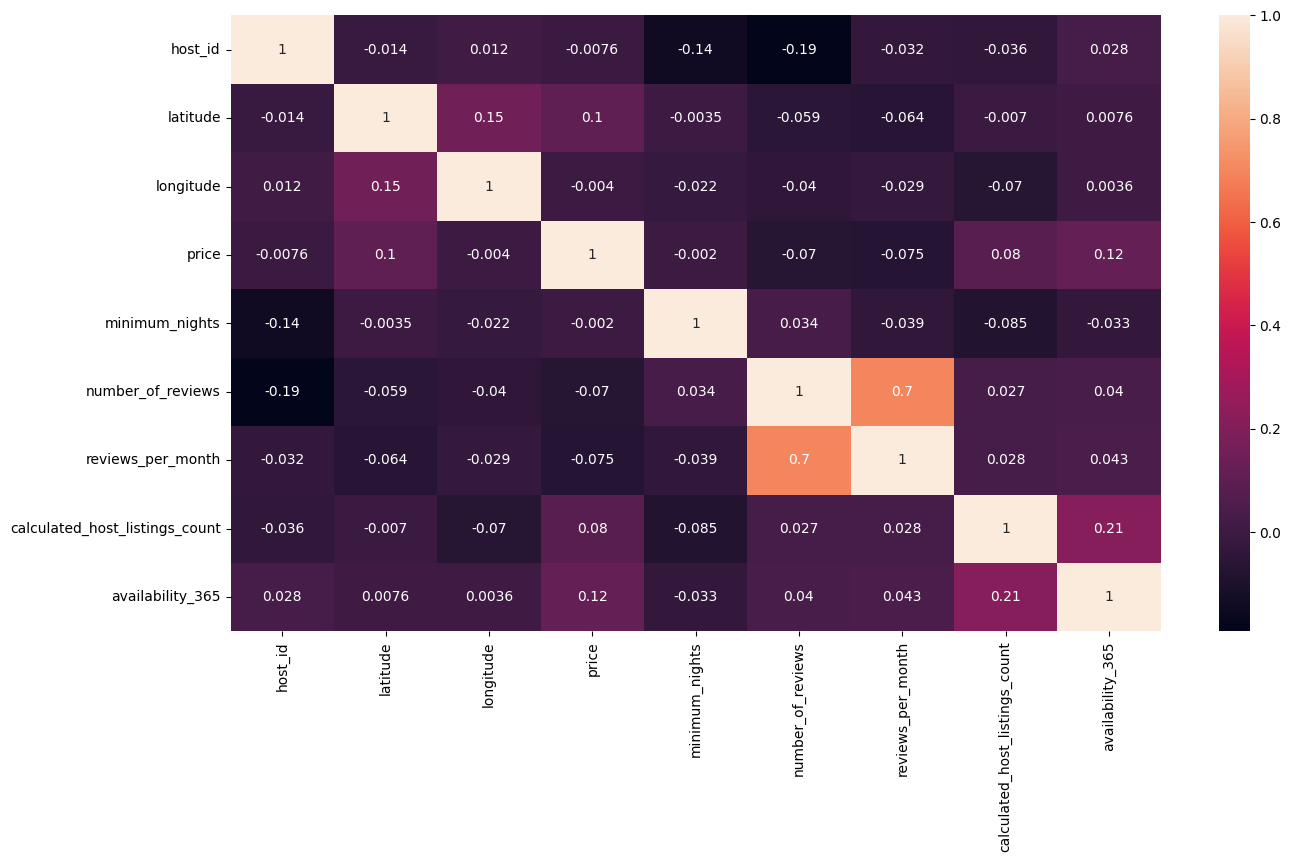

In [16]:
# Select only numeric data types
numeric_columns = airbnb.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_columns.corr(method='kendall')

# Plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Print column names
print(numeric_columns.columns)


In [16]:
airbnb.shape

(20837, 12)

In [17]:
airbnb.head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,73,0.61,1,82
1,83531,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,0.52,2,162
2,82175,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,0.00,6,213
3,101471,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,9,0.14,1,362
4,101653,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,67,0.64,1,342
5,114340,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,142,1.21,1,365
6,130907,Centro,Sol,40.41552,-3.70346,Entire home/apt,65,5,170,1.47,3,365
7,132883,Centro,Embajadores,40.41111,-3.70269,Entire home/apt,54,3,8,0.14,1,0
8,175752,Centro,Justicia,40.41978,-3.69730,Entire home/apt,55,3,162,1.41,1,321
9,130907,Centro,Universidad,40.42096,-3.70428,Entire home/apt,90,3,47,0.42,3,362


## Data Visualization

In [18]:
import seaborn as sns

In [19]:
airbnb['neighbourhood_group'].unique()

array(['Chamartín', 'Latina', 'Arganzuela', 'Centro',
       'Fuencarral - El Pardo', 'Salamanca', 'Tetuán', 'Ciudad Lineal',
       'Chamberí', 'Villaverde', 'Hortaleza', 'Moncloa - Aravaca',
       'Carabanchel', 'Retiro', 'San Blas - Canillejas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Villa de Vallecas', 'Moratalaz',
       'Vicálvaro'], dtype=object)

### Plot all Neighbourhood Group

In [24]:
!pip3 install seaborn --upgrade


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


Text(0.5, 1.0, 'Neighbourhood Group')

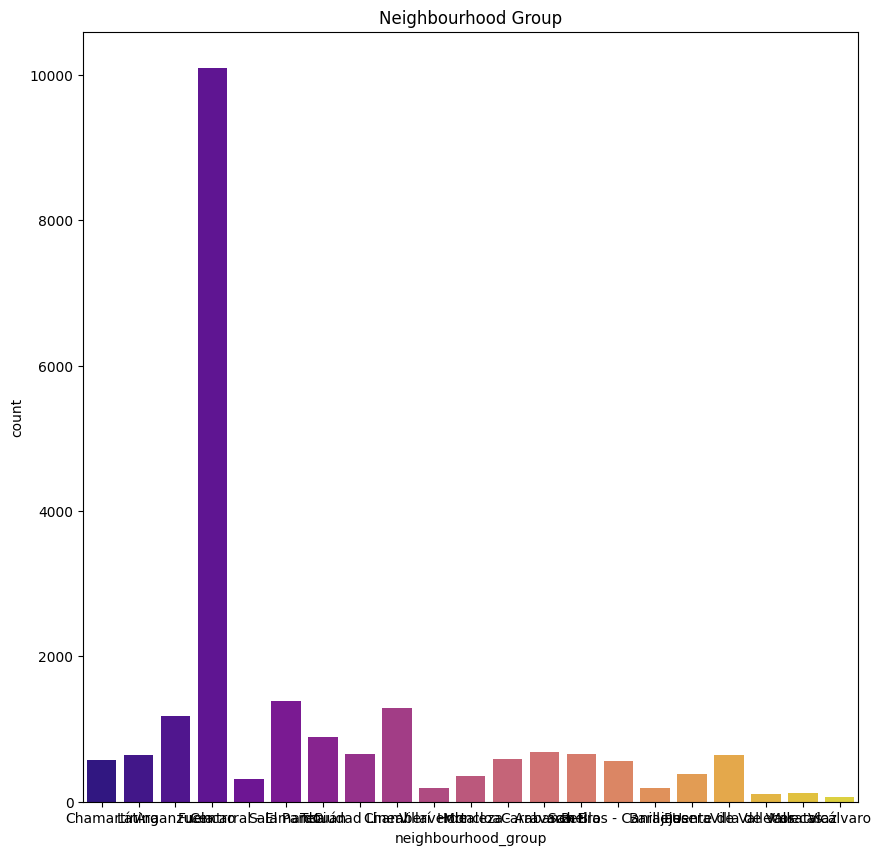

In [26]:
sns.countplot(x=airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')


### Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

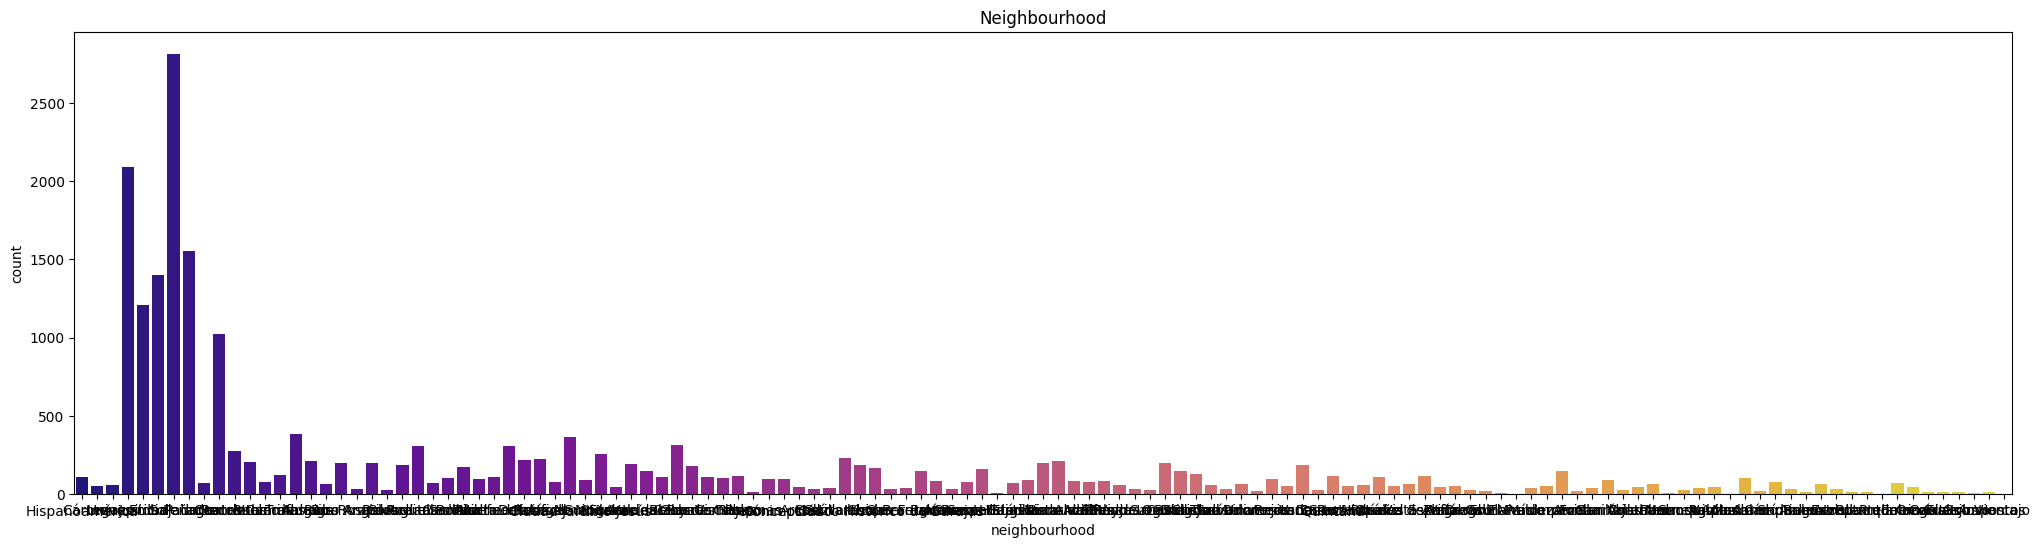

In [28]:
sns.countplot(x=airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

### Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

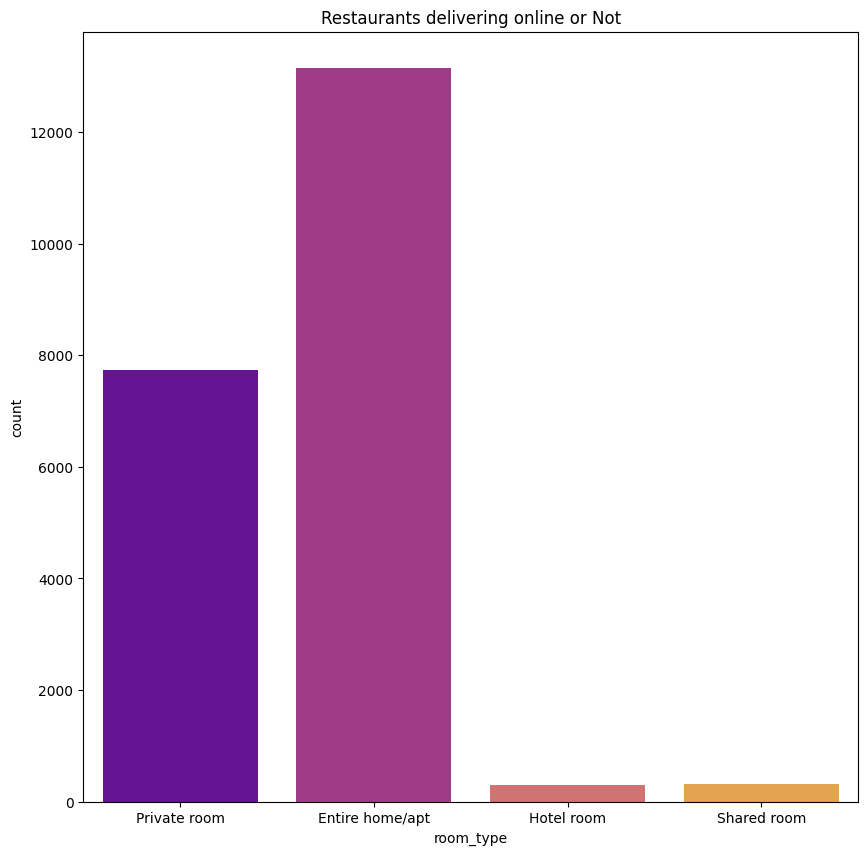

In [29]:

sns.countplot(x= airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

#### Relation between neighbourgroup and Availability of Room

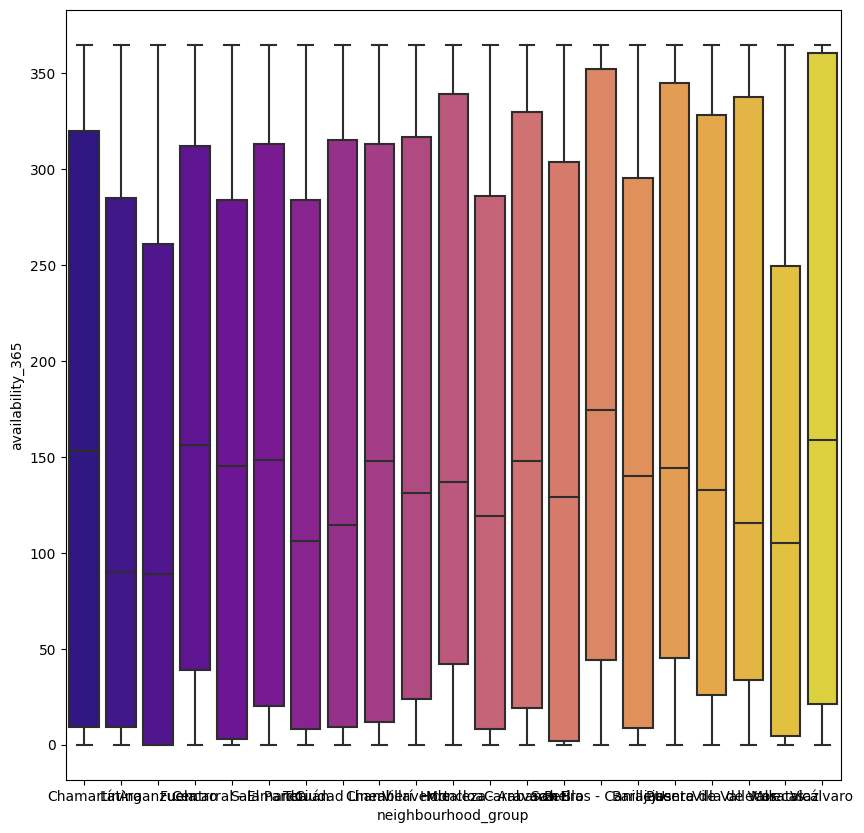

In [30]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

## Map of Neighbourhood group

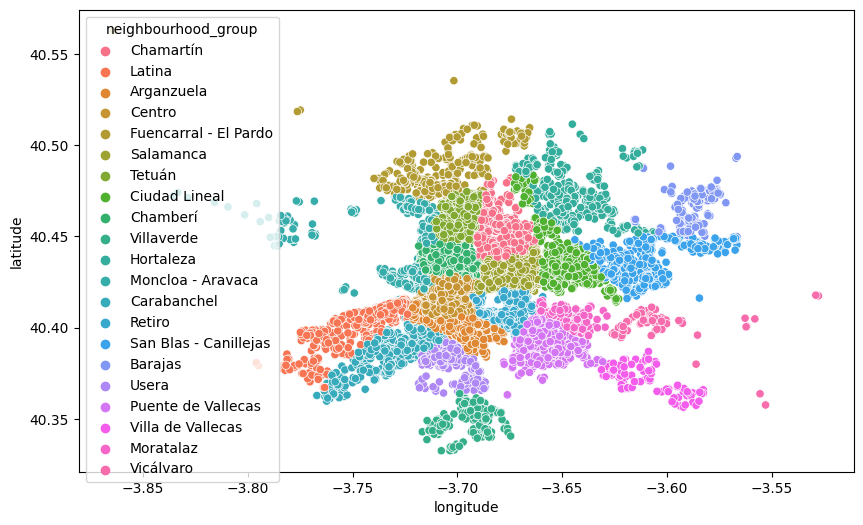

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.neighbourhood_group)
plt.ioff()


## Map of Neighbourhood

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.ioff()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

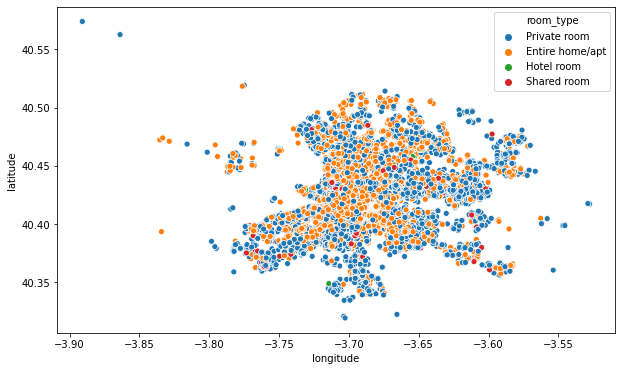

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

## Availability of Room

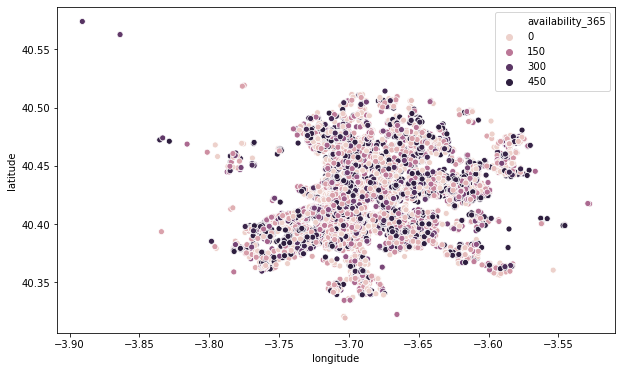

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

## WordCloud

In [28]:
from wordcloud import WordCloud

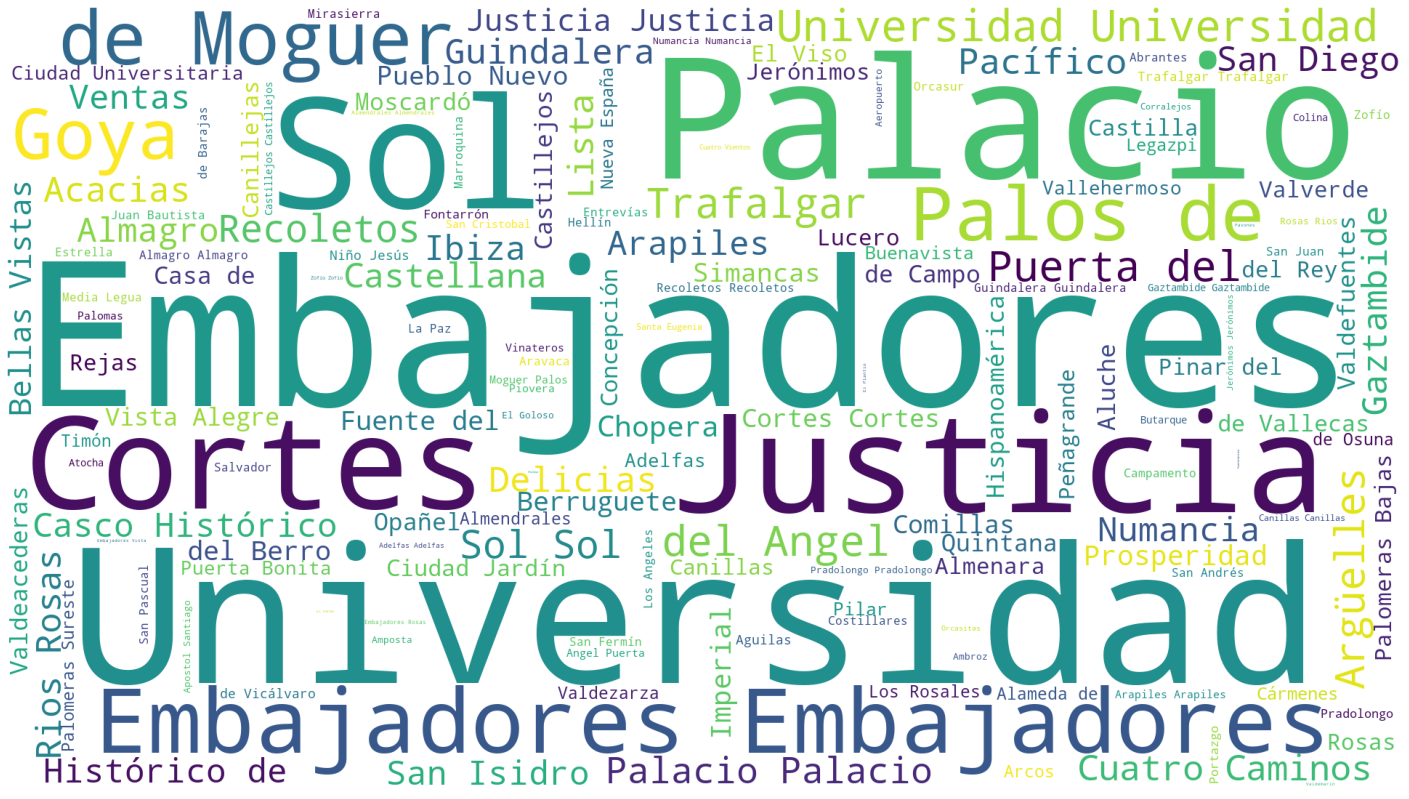

In [29]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

## Regression Analysis

In [30]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Chamartín,Private room,70,1,1,53
1,Latina,Private room,17,4,2,48
2,Centro,Entire home/apt,80,5,1,354
3,Centro,Entire home/apt,115,3,1,301
4,Arganzuela,Private room,25,2,1,337


In [31]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [32]:
airbnb_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,70,1,1,53
1,1,0,17,4,2,48
2,2,1,80,5,1,354
3,2,1,115,3,1,301
4,3,0,25,2,1,337
5,2,1,65,5,3,322
6,2,1,54,3,1,0
7,2,1,90,3,3,337
8,2,0,40,1,1,363
9,2,0,45,1,2,352


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

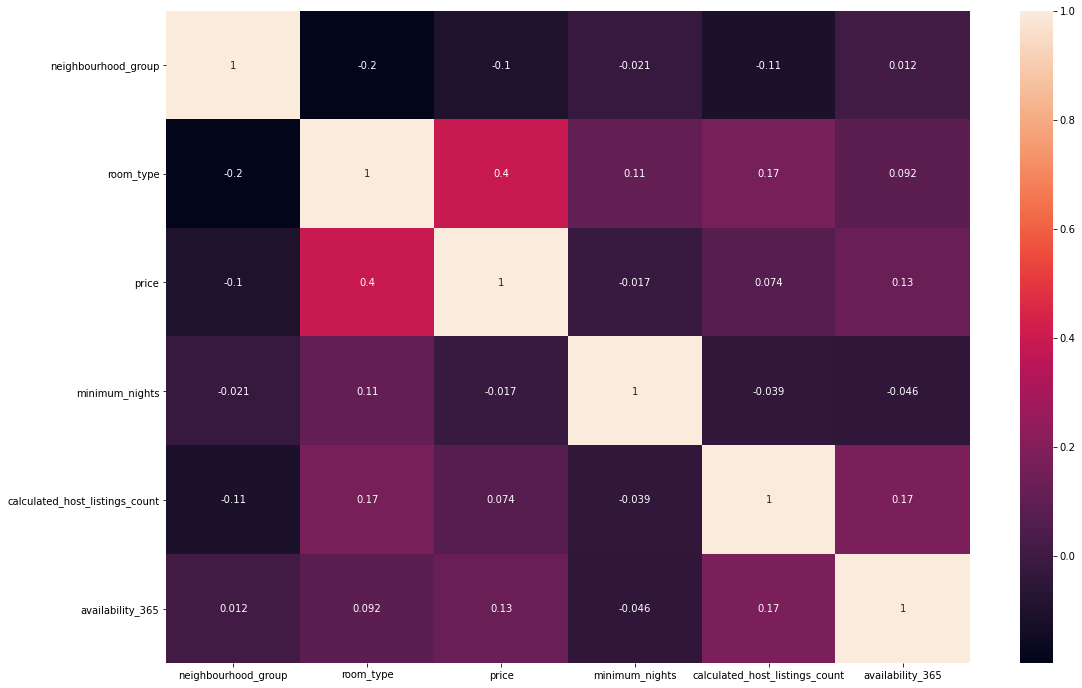

In [33]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [35]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

13947     64
3812      65
18002     50
11583    110
9254      38
Name: price, dtype: int64

In [36]:
x_train.shape

(18753, 5)

In [37]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.0028171129348503188

In [38]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.471629550277466

In [39]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.4708623507064762

## For further updates of this Kernel check into this GitHub Link: https://github.com/ankitpatel1661/Madrid-Airbnb

>  # <font color='orange'> Please UPVOTE if you found these helpful :) </font>